In [1]:
import tensorflow as tf
import make_layers as hpred
import importlib
importlib.reload(hpred)
import matplotlib.pyplot as plt
import numpy as np
import os

os.environ["CUDA_VISIBLE_DEVICES"]="1"

#I need to devise a dataset with many independent timescales of temporal dependency


timescales = np.linspace(1,100,10)

tot = 200000

p = .01

tlen = 50

#var = dec^2 var + b

s = .5

dec1 = .9
b1 = np.sqrt((1. - dec1**2)*s*s)

dec2 = .5
b2 = np.sqrt((1. - dec2**2)*s*s)


(1, 180000, 1)
(1, 20002, 1)


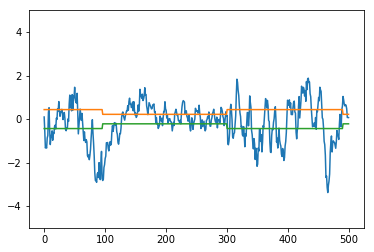

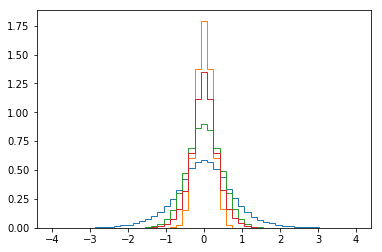

In [2]:
trans = np.random.uniform(0,1,[tot])

state = [0]
go = True
ticker = 0
val = -1
for k in trans:
    if k < p and go:
        val = np.random.randint(len(timescales))
        state.append(1)
        ticker 
    elif go == False:
        
    else:
        state.append(0)
state = np.array(state)


data = [np.random.normal(L[state[0]],b**2)]
signal = [np.zeros([len(timescales)])]

rand = np.random.randn(tot+1)
l = 

for k in range(len(state)):
    data.append(dec * data[-1] + V[state[k]]*rand[k])

data = np.expand_dims(np.expand_dims(np.array(data),0),-1)

data += np.random.standard_normal(data.shape)*.01

test_frac = int(.9*tot)
dat = data[:,:test_frac]
var = data[:,test_frac:]

print(dat.shape)
print(var.shape)
plen = 500
plt.plot(data[0,:plen,0])
plt.plot(V[1]*state[:plen] + V[0]*(1-state[:plen])) 
plt.plot(-V[1]*state[:plen] - V[0]*(1-state[:plen]))
plt.ylim([-5,5])
plt.show()

t1 = V[0]*np.random.randn(int(tot/2))
t2 = V[1]*np.random.randn(int(tot/2))

plt.hist(data[0,:,0],np.linspace(-4,4,50),histtype = "step",normed = True)
plt.hist(t1,np.linspace(-4,4,50),histtype = "step",normed = True)
plt.hist(t2,np.linspace(-4,4,50),histtype = "step",normed = True)
plt.hist(np.concatenate([t1,t2]),np.linspace(-4,4,50),histtype = "step",normed = True)
plt.show()

In [15]:

def trainable(scope = "",match = True):
    a = tf.trainable_variables()
    if match:
        return [x for x in a if x.name[:len(scope)] == scope]
    else:
        return [x for x in a if x.name[:len(scope)] != scope]

tf.reset_default_graph()

isize = [1,tlen,1]

A = hpred.hpred(isize,[10,10,10])#,stop_fwd_grad = False,stop_bwd_grad = True)

for k in A.prediction:
    print(k.shape)

loss,loss_list = A.prediction_loss()

adam = tf.train.AdamOptimizer(learning_rate = .001)

weights = trainable()

wl = .0001*tf.reduce_sum([tf.reduce_sum(tf.abs(w)) for w in weights])

train = adam.minimize(loss + wl)

final_activation = A.final_activation

init = tf.global_variables_initializer()

(1, 100, 1)
(1, 100, 10)
(1, 100, 10)
(100, 10)
(100, 10)


In [16]:
sess = tf.Session()
sess.run(init)

final_act = [np.zeros([int(x) for x in k.shape],dtype = np.float32) for k in A.init_activity]
losses = []
for k in range(0,int(test_frac/tlen) - 1):
    repl_dict = {}
    for j in range(len(A.layers)):
        repl_dict[A.init_activity[j]] = final_act[j]


    repl_dict[A.data] = dat[:,tlen*k : tlen * (k+1)]
    LOSS = sess.run(loss_list,repl_dict)
    losses.append(LOSS)
    _,final_act = sess.run([train,A.final_activation],repl_dict)
    print("{}\t{}\t{}".format(round(float(k*tlen)/test_frac,2),LOSS,np.mean(state[tlen*k:tlen*(k+1)])))


0.0	[163.29755, 198.76694, 15.865833]	0.96
0.0	[49.124439, 59.443401, 5.9580455]	0.0
0.0	[9.9682932, 11.733939, 1.2523317]	0.0
0.0	[96.769653, 111.44054, 9.0660467]	1.0
0.0	[136.63719, 156.00539, 13.317764]	0.9
0.0	[18.646631, 20.877895, 2.1217074]	0.0
0.0	[51.760639, 56.34483, 5.6984291]	0.33
0.0	[16.012184, 17.220676, 1.7076125]	0.0
0.0	[52.291622, 54.348976, 5.2467237]	0.42
0.01	[141.302, 149.2959, 11.145573]	1.0
0.01	[47.071362, 48.841957, 3.5275714]	0.57
0.01	[77.632324, 77.51255, 7.1022635]	0.46
0.01	[68.632759, 69.007652, 4.8821421]	1.0
0.01	[121.8871, 120.74709, 8.5614624]	0.86
0.01	[61.216835, 58.293667, 4.7737718]	0.35
0.01	[52.375237, 48.669811, 4.2485991]	0.33
0.01	[24.45039, 22.684582, 1.7513928]	0.01
0.01	[33.492115, 31.759577, 1.9194119]	0.33
0.01	[51.839622, 46.654438, 3.5524399]	1.0
0.01	[39.984764, 35.82177, 2.7642894]	0.53
0.01	[17.249298, 15.064694, 1.0948499]	0.0
0.01	[14.203527, 12.60989, 0.78687263]	0.0
0.01	[24.612223, 20.006659, 1.7349038]	0.85
0.01	[102.93867,

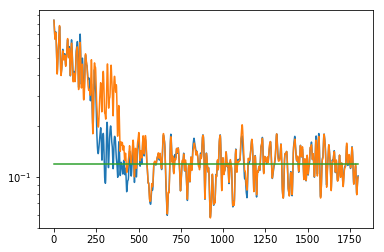

In [17]:
from scipy.ndimage.filters import gaussian_filter1d as gfilt

losses2 = np.array(losses2)
losses = np.array(losses)

for l in range(1):
    plt.plot(gfilt(losses[:,l]/100,3))
    
for l in range(1):
    plt.plot(gfilt(losses2[:,l]/100,3))
    
plt.plot([0,len(losses2)],[(V[1]**2 + V[0]**2)/2,(V[1]**2 + V[0]**2)/2])
plt.yscale("log")
plt.show()

In [ ]:
pred = []
activ = []

for k in range(0,20):
    repl_dict = {}
    for j in range(len(A.layers)):
        repl_dict[A.init_activity[j]] = final_act[j]


    repl_dict[A.data] = var[:,tlen*k : tlen * (k+1)]

    P,final_act = sess.run([A.get_attribute("prediction"),A.final_activation],repl_dict)
    pred.append(P)
#    activ.append(sct)
    print("{}".format(round(float(k*tlen)/len(var),2)))
sess.close()

In [ ]:
p1 = np.concatenate(np.squeeze(np.array([p[0] for p in pred])))

In [ ]:
print(p1.shape)
plt.plot(p1)
plt.plot(var[0,:2000])
plt.ylim([-2,2])
plt.show()

plt.plot(p1 - var[0,:2000,0])
plt.ylim([-2,2])
plt.show()